## Homework 7

Practice training a deep neural network on the CIFAR10 image dataset:

1. Visualize 20 examples of CIFAR. You can load it with keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes.

2. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function. (use a for loop!!)

3. Using Adam optimization and early stopping, train the network on the CIFAR10 dataset. You’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.

4. Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

5. Try replacing Batch Normalization with SELU, and make the necessary adjustments to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.)

6. Paste a link to your Ipython notebook. Make sure all the images are visible and that there are no errors when clicking on the link.

In [54]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

data = keras.datasets.cifar10.load_data()

In [55]:
np.random.seed(42)
tf.set_random_seed(42)

**1.** Visualize 20 examples of CIFAR. You can load it with keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes.

In [56]:

def pad(x, pad=4):
    return np.pad(x, ((0,0), (pad,pad),(pad,pad),(0,0)), mode='reflect')

In [57]:

cifar_data = keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train_full = pad(X_train_full)
X_test = pad(X_test)

X_train_full = X_train_full.astype('float32')
X_train_full = (X_train_full - [125.3, 123.0, 113.9]) / [63.0, 62.1, 66.7]
X_test = X_test.astype('float32')
X_test = (X_test - [125.3, 123.0, 113.9]) / [63.0, 62.1, 66.7]

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [58]:
X_train_full.shape 

(50000, 40, 40, 3)

50,000 images, 32 by 32, 3 channels for red, green, and blue, for each pixel

In [59]:
\

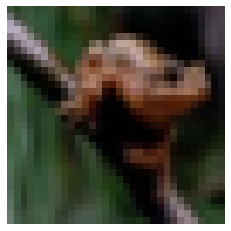

In [60]:
plt.imshow(X_train[0],)
plt.axis('off')
plt.show()

In [61]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [62]:
class_names[y_train[0][0]]

'frog'

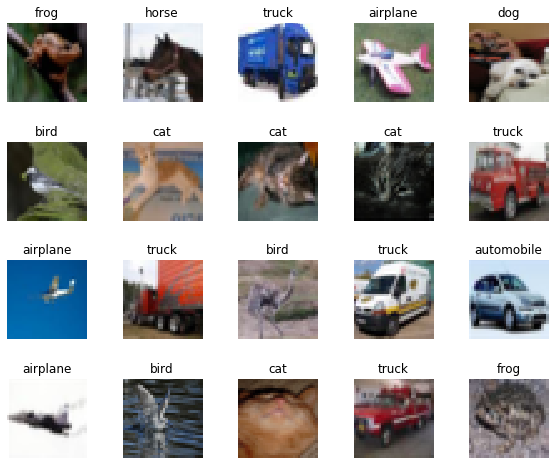

In [63]:
n_rows = 4
n_cols = 5
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**2.** Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function. (use a for loop!!)

In [64]:
input_shape = (3, 32, 32) if 0 == 'th' else (32, 32, 3)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=input_shape))
model.add(keras.layers.Dense(300, activation="elu",
                             kernel_initializer="he_normal"))
for layer in range(20):
    model.add(keras.layers.Dense(100, activation="elu",
                                 kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

**3.** Using Adam optimization and early stopping, train the network on the CIFAR10 dataset. You’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.

In [65]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

patience = 5
early_stopping_cb = keras.callbacks.EarlyStopping(patience=patience,
                                                  restore_best_weights=True)

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_1.h5", save_best_only=True) 

In [66]:
epoch_number = 70

In [67]:
history_1 = model.fit(X_train, y_train, epochs=epoch_number,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/70
45000/45000 [==============================] - 29s 644us/sample - loss: 2.1237 - acc: 0.2077 - val_loss: 2.0059 - val_acc: 0.2302
Epoch 2/70
45000/45000 [==============================] - 22s 498us/sample - loss: 1.9390 - acc: 0.2705 - val_loss: 1.8891 - val_acc: 0.2902
Epoch 3/70
45000/45000 [==============================] - 21s 467us/sample - loss: 1.8851 - acc: 0.3002 - val_loss: 1.8663 - val_acc: 0.3386
Epoch 4/70
45000/45000 [==============================] - 19s 430us/sample - loss: 1.8431 - acc: 0.3262 - val_loss: 1.8307 - val_acc: 0.3302
Epoch 5/70
45000/45000 [==============================] - 22s 482us/sample - loss: 1.8199 - acc: 0.3355 - val_loss: 1.8590 - val_acc: 0.3282
Epoch 6/70
45000/45000 [==============================] - 22s 492us/sample - loss: 1.7840 - acc: 0.3490 - val_loss: 1.7717 - val_acc: 0.3634
Epoch 7/70
45000/45000 [==============================] - 21s 478us/sample - loss: 1.7711 - acc: 0.3567 -

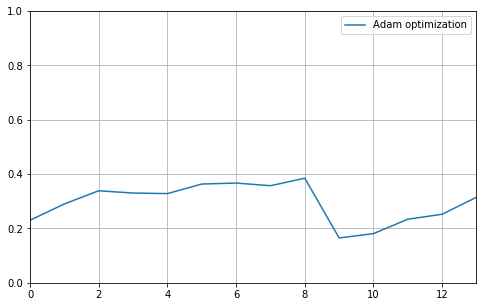

In [68]:
import pandas as pd

history_Adam_optimization = pd.DataFrame(history_1.history)
history_Adam_optimization.val_acc.plot(figsize=(8, 5), label = "Adam optimization")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(loc='upper right')
plt.show()

**4.** Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [72]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=input_shape))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="elu",
                             kernel_initializer="he_normal"))

for layer in range(20):
    model.add(keras.layers.Dense(100, activation="elu",
                                 kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(10, activation="softmax"))

In [74]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_2.h5", save_best_only=True) 

In [75]:
history_2 = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 62s 1ms/sample - loss: 1.9318 - acc: 0.3045 - val_loss: 1.7269 - val_acc: 0.3704
Epoch 2/100
45000/45000 [==============================] - 38s 847us/sample - loss: 1.7280 - acc: 0.3838 - val_loss: 1.6736 - val_acc: 0.4006
Epoch 3/100
45000/45000 [==============================] - 36s 794us/sample - loss: 1.6482 - acc: 0.4157 - val_loss: 1.6019 - val_acc: 0.4330
Epoch 4/100
45000/45000 [==============================] - 37s 816us/sample - loss: 1.5850 - acc: 0.4368 - val_loss: 1.5196 - val_acc: 0.4630
Epoch 5/100
45000/45000 [==============================] - 35s 769us/sample - loss: 1.5330 - acc: 0.4574 - val_loss: 1.4690 - val_acc: 0.4804
Epoch 6/100
45000/45000 [==============================] - 35s 783us/sample - loss: 1.4855 - acc: 0.4721 - val_loss: 1.4498 - val_acc: 0.4862
Epoch 7/100
45000/45000 [==============================] - 34s 752us/sample - loss: 1.4434 - acc: 0.4

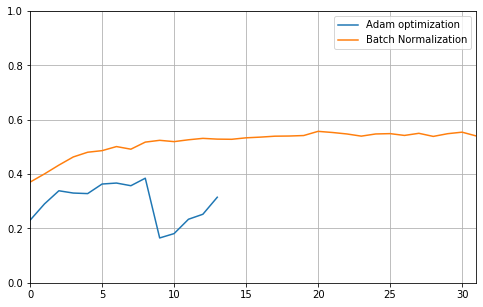

In [76]:
history_w_BatchNormalization = pd.DataFrame(history_2.history)

history_Adam_optimization.val_acc.plot(figsize=(8, 5), label = "Adam optimization")
history_w_BatchNormalization.val_acc.plot(figsize=(8, 5), label = "Batch Normalization")

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(loc='upper right')
plt.show()

**Comparisons:**
With only Adam optimization, early stopping is triggered much earlier and the score obtained is much lower than with the addition of batch normalization. Additionally, it seems that batch normalization produces smoother learning curves.

**5.** Try replacing Batch Normalization with SELU, and make the necessary adjustments to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.)

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=input_shape))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(20):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=patience,
                                                  restore_best_weights=True)

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_3.h5", save_best_only=True) 

In [29]:
# Lets rescale the input
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [30]:
history_3 = model.fit(X_train_scaled, y_train, epochs=epoch_number,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/70
45000/45000 [==============================] - 20s 444us/sample - loss: 1.9257 - acc: 0.3131 - val_loss: 1.7834 - val_acc: 0.3672
Epoch 2/70
45000/45000 [==============================] - 15s 335us/sample - loss: 1.7136 - acc: 0.3888 - val_loss: 1.6845 - val_acc: 0.3954
Epoch 3/70
45000/45000 [==============================] - 14s 318us/sample - loss: 1.6128 - acc: 0.4251 - val_loss: 1.6532 - val_acc: 0.4178
Epoch 4/70
45000/45000 [==============================] - 14s 319us/sample - loss: 1.5430 - acc: 0.4503 - val_loss: 1.6064 - val_acc: 0.4336
Epoch 5/70
45000/45000 [==============================] - 14s 320us/sample - loss: 1.4871 - acc: 0.4710 - val_loss: 1.5739 - val_acc: 0.4390
Epoch 6/70
45000/45000 [==============================] - 14s 321us/sample - loss: 1.4381 - acc: 0.4898 - val_loss: 1.5757 - val_acc: 0.4382
Epoch 7/70
45000/45000 [==============================] - 14s 318us/sample - loss: 1.3984 - acc: 0.5040 -

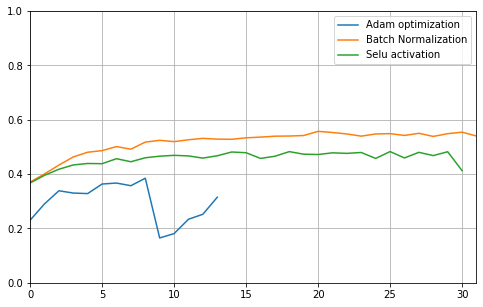

In [77]:
history_w_selu = pd.DataFrame(history_3.history)

history_Adam_optimization.val_acc.plot(figsize=(8, 5), label = "Adam optimization")
history_w_BatchNormalization.val_acc.plot(figsize=(8, 5), label = "Batch Normalization")
history_w_selu.val_acc.plot(figsize=(8, 5), label = "Selu activation")

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(loc='upper right')
plt.show()

For me, batch normalization worked the best on this dataset. 

However, I'm concerned that I should have seen better results than I did. After some brief reading, there are many who saw scores above 90% on the validation set for their models. There models were much more complex, and maybe ours can't achieve scores likes this without some modifications, but I may also have made a mistake somewhere. 

I've spent some time modifying the data before inputing it into our model for training but I will run out of time if I try to train the networks again before the submission deadline.